In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import gamma

DATASET CREATION


In [ ]:
random.seed(2)
coin_toss = random.choices(range(0,2), weights= [0.31,0.69],k=160)
df = pd.DataFrame(coin_toss)

In [ ]:
def maximum_likelihood_estimator(df):
  m = 0
  for item in df[0]:
    if item==1:
      m = m + 1
  return m/len(df),m

In [ ]:
def distribution(u,a,b):
  return ((gamma(a+b))/(gamma(a)*gamma(b)))*np.power(u,a-1)*np.power(1-u,b-1)

LISA'S APPROACH



In [ ]:
u,m = maximum_likelihood_estimator(df)

In [ ]:
a = 2
b = 3
p_head = (m+a)/(m+a+len(df)-m+b)
print("Lisa's posterior probability estimate of getting a head is {}".format(p_head))

Lisa's posterior probability estimate of getting a head is 0.6848484848484848


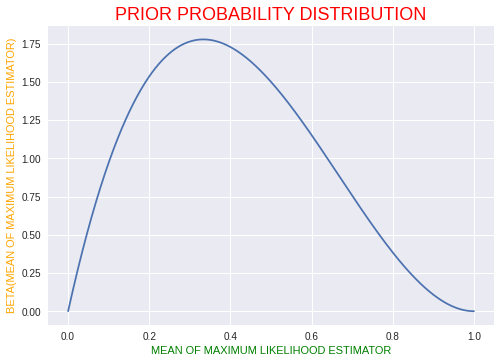

In [ ]:
plt.subplot()
plt.style.use('seaborn') 
plt.title('PRIOR PROBABILITY DISTRIBUTION',fontsize = 18,color = 'red')
plt.xlabel('MEAN OF MAXIMUM LIKELIHOOD ESTIMATOR',color = 'green')
plt.ylabel('BETA(MEAN OF MAXIMUM LIKELIHOOD ESTIMATOR)',color = 'orange')
x = ([i*0.00001 for i in range(1,100000)])
y = ([distribution(i*0.00001, a, b) for i in range(1,100000)])
plt.plot(x,y)

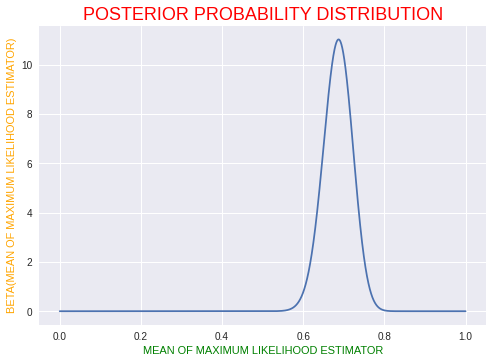

In [ ]:
plt.subplot()
plt.style.use('seaborn') 
plt.title('POSTERIOR PROBABILITY DISTRIBUTION',fontsize = 18,color = 'red')
plt.xlabel('MEAN OF MAXIMUM LIKELIHOOD ESTIMATOR',color = 'green')
plt.ylabel('BETA(MEAN OF MAXIMUM LIKELIHOOD ESTIMATOR)',color = 'orange')
x = ([i*0.00001 for i in range(1,100000)])
y = ([distribution(i*0.00001, m+a, len(df) - m + b) for i in range(1,100000)])
plt.plot(x,y)

BOBS APPROACH


In [ ]:
posterior_values = []
a = 2
b = 3
i = 1
for item in df[0]:
  plt.subplot()
  plt.style.use('seaborn') 
  plt.title('PRIOR PROBABILITY DISTRIBUTION '+str(i),fontsize = 18,color = 'red')
  plt.xlabel('MEAN OF MAXIMUM LIKELIHOOD ESTIMATOR',color = 'green')
  plt.ylabel('BETA(MEAN OF MAXIMUM LIKELIHOOD ESTIMATOR)',color = 'orange')
  file = "post.png"
  x = ([i*0.0002 for i in range(1,5000)])
  y = ([distribution(i*0.0002, a, b) for i in range(1,5000)])
  plt.plot(x,y) 
  plt.savefig('post{}.png'.format(i))
  plt.close()
  posterior_values.append(a/(a+b))
  a = item + a
  b = 1 - item + b
  i = i+1

In [ ]:
print("Bobs probability estimate of getting a head is {}".format(posterior_values[-1]))

Bobs probability estimate of getting a head is 0.6829268292682927


# New Section